# Ejercicio 1

In [95]:
import ex_1.main as main
from perceptrons.multilayer_perceptron import MultiLayerPerceptron
from perceptrons.simple_step_perceptron import SimpleStepPerceptron
import numpy as np
import matplotlib.pyplot as plt

Declare paths

In [96]:
config_file_path = "ex_1/resources/config.json"
results_file_path = "ex_1/resources/perceptron_data.txt"

In [97]:
learning_rates_results = "ex_1/resources/learning_rates.txt"

Clear perceptron data file

In [98]:
open(results_file_path, "w").close()

W min[2.60619391 4.41345098 3.58794061]


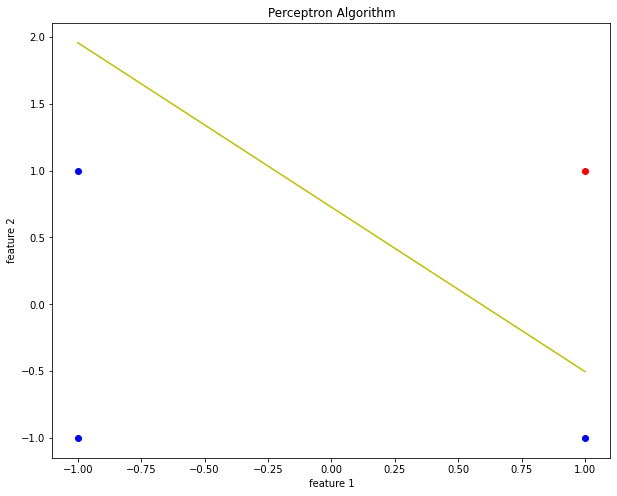

In [99]:
training_set, expected_output, learn_rate, epoch_limit, execution_count = main.parse_config(config_file_path)
p = SimpleStepPerceptron(expected_output, training_set, learn_rate)
w_min, error_min, i = p.learn(epoch_limit*len(training_set), lambda i, error, weights: open(results_file_path, "a").write("{}\t{}\t{}\n".format(i, error, weights)))
main.plot_decision_boundary(training_set, w_min, expected_output)

Text(0, 0.5, 'Error')

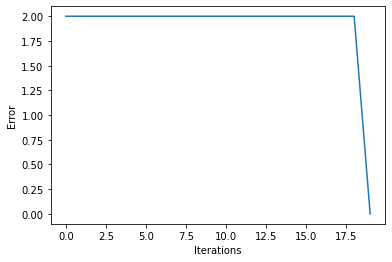

In [100]:
iterations, errors = main.iteration_vs_error(results_file_path)
plt.plot(iterations, errors)
plt.xlabel("Iterations")
plt.ylabel("Error")

Genero el output para después promediarlo

In [101]:
multiple_results_path = f"ex_1/resources/multiple_results_{learn_rate}.txt"
open(multiple_results_path, "w").close()

In [102]:
p = SimpleStepPerceptron(expected_output, training_set, learn_rate)

for i in range(execution_count):
    w_min, e_min, i = p.learn(epoch_limit*len(training_set), lambda i, error, weights: open(results_file_path, "a").write("{},{}\n".format(i, error)))
    open(multiple_results_path, "a").write("{},{}\n".format(i, e_min))

W min[2.10448772 1.28205339 1.67529186]
W min[1.94696623 1.2165897  1.93538147]
W min[0.3308453  2.65672775 2.72624225]
W min[1.23933961 1.36996799 0.97405734]
W min[0.6711393  0.6289888  0.85115006]
W min[1.91926775 0.92553961 1.44607466]
W min[1.7025513  2.50863144 0.8602894 ]
W min[2.94630165 0.48593222 2.8592456 ]
W min[2.04524516 2.07614087 0.92705042]
W min[0.59315902 2.90278261 2.66147533]
W min[2.8699804  2.67386156 0.52944435]
W min[1.81540767 2.56797555 2.75566312]
W min[0.2701054  0.42208408 0.24070344]
W min[1.17848292 2.01571808 1.51778296]
W min[2.33435035 1.74997378 1.80098242]
W min[1.99362979 1.06746624 2.46243766]
W min[1.35251448 1.7442197  1.95710765]
W min[1.74585433 1.7982179  1.77913035]
W min[2.59283096 2.61278686 1.64669518]
W min[2.7987722  1.92216054 1.58738569]


In [103]:
i_avg, i_std, e_avg, e_std = main.parse_results_for_rate(multiple_results_path)
open(learning_rates_results, "a").write("{},{},{},{},{}\n".format(learn_rate, i_avg, i_std, e_avg, e_std))

34